In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[:3]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-seedlings-classification/sample_submission.csv
/kaggle/input/plant-seedlings-classification/test/fd87b36ae.png
/kaggle/input/plant-seedlings-classification/test/0e8492cb1.png
/kaggle/input/plant-seedlings-classification/test/8d6acbe9b.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/4ae939d7d.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/b8664f705.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/628b08c82.png
/kaggle/input/plant-seedlings-classification/train/Common wheat/df584ca28.png
/kaggle/input/plant-seedlings-classification/train/Common wheat/9026da493.png
/kaggle/input/plant-seedlings-classification/train/Common wheat/1a9a859c9.png
/kaggle/input/plant-seedlings-classification/train/Charlock/67e37de9b.png
/kaggle/input/plant-seedlings-classification/train/Charlock/8b35222d0.png
/kaggle/input/plant-seedlings-classification/train/Charlock/4e0cef11d.png
/kaggle/input/plant-seedlings-classi

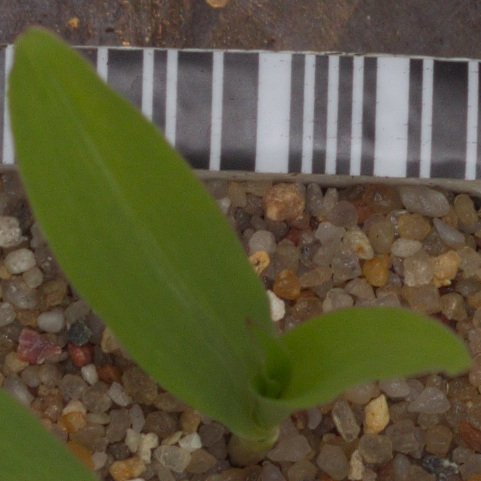

In [15]:
from PIL import Image
Image.open('/kaggle/input/plant-seedlings-classification/train/Maize/266211c3c.png')

In [16]:
#size 바꾸기
import cv2
image=cv2.imread('/kaggle/input/plant-seedlings-classification/train/Black-grass/c025e2886.png')
image.shape

(1328, 1328, 3)

In [17]:
image=cv2.resize(image,(256,256))
image.shape


(256, 256, 3)

In [18]:
#이미지 사이즈 저장하기

cv2.imwrite('sample.png',image)


True

In [19]:
import glob
train=pd.DataFrame({'path':glob.glob("/kaggle/input/plant-seedlings-classification/train/*/*")})
train
pd.options.display.max_colwidth=200
#image 데이터 뽑아봅기
train['label']=train['path'].apply(lambda x:x.split("/")[-2])
train

,path,label
0,/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/4ae939d7d.png,Scentless Mayweed
1,/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/b8664f705.png,Scentless Mayweed
2,/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/628b08c82.png,Scentless Mayweed
3,/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/9ab3b61db.png,Scentless Mayweed
4,/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/086894274.png,Scentless Mayweed
...,...,...
4745,/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/f0127f70d.png,Shepherds Purse
4746,/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/179cedc9e.png,Shepherds Purse
4747,/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/a0ec33869.png,Shepherds Purse
4748,/kaggle/input/plant-seedlings-classification/train/Shepherds Purse/33010c8cb.png,Shepherds Purse


In [20]:
#keras 는 없어도 잘된다
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#train["label"]=le.fit_transform(train["label"])
#train

In [21]:
#folder 만들어서 image 넣기 
os.makedirs('resized_train',exist_ok=True)
for path in train['path']:
    image=cv2.imread(path)
    image=cv2.resize(image,(256,256))
    label=path.split('/')[-2]
    name=path.split('/')[-1]
    cv2.imwrite('resized_train/'+label+'_'+name,image)
    


In [22]:
train=pd.DataFrame({'path':glob.glob("resized_train/*")})
train

,path
0,resized_train/Shepherds Purse_b30a50916.png
1,resized_train/Scentless Mayweed_7863544c8.png
2,resized_train/Common Chickweed_168b7d0ec.png
3,resized_train/Fat Hen_a7d5da828.png
4,resized_train/Common Chickweed_654021d0e.png
...,...
4745,resized_train/Cleavers_9b8ed8471.png
4746,resized_train/Sugar beet_e11ffb03d.png
4747,resized_train/Scentless Mayweed_f8c96bd65.png
4748,resized_train/Common Chickweed_786df0a52.png


In [23]:
train['label']=train['path'].apply(lambda x:x.split('/')[-1].split('_')[0])
train

,path,label
0,resized_train/Shepherds Purse_b30a50916.png,Shepherds Purse
1,resized_train/Scentless Mayweed_7863544c8.png,Scentless Mayweed
2,resized_train/Common Chickweed_168b7d0ec.png,Common Chickweed
3,resized_train/Fat Hen_a7d5da828.png,Fat Hen
4,resized_train/Common Chickweed_654021d0e.png,Common Chickweed
...,...,...
4745,resized_train/Cleavers_9b8ed8471.png,Cleavers
4746,resized_train/Sugar beet_e11ffb03d.png,Sugar beet
4747,resized_train/Scentless Mayweed_f8c96bd65.png,Scentless Mayweed
4748,resized_train/Common Chickweed_786df0a52.png,Common Chickweed


In [40]:
from sklearn.model_selection import train_test_split
#x_train 이랑 x_valid 만 넣는 이유는 train_generator 가 알아서 y 값을 넣어야줘야한다 
x_train,x_valid=train_test_split(train,test_size=0.2,random_state=42)
train['label']=train['label'].astype(str)


from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


#idg 에 train 에 만 넣어도
idg2=ImageDataGenerator()

train_generator=idg.flow_from_dataframe(x_train,x_col='path',y_col='label')
valid_generator=idg2.flow_from_dataframe(x_valid,x_col='path',y_col='label')





Found 3800 validated image filenames belonging to 12 classes.
Found 950 validated image filenames belonging to 12 classes.


In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
model = Sequential()
model.add(EfficientNetB1(include_top=False, pooling='avg'))
model.add(Dense(12, activation='softmax'))  
model.compile(metrics='acc', optimizer='adam', loss='categorical_crossentropy')



In [43]:
#model.fit(train_generator, epochs=5)

from tensorflow.keras.callbacks import EarlyStopping

# Add the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

# Fit the model using both the training and validation generators
model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    callbacks=[early_stopping]  # Include the EarlyStopping callback here
)


Epoch 1/20


2024-03-08 05:14:11.616928: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/efficientnetb1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


119/119 [==============================] - 111s 534ms/step - loss: 0.6828 - acc: 0.7824 - val_loss: 1.2455 - val_acc: 0.7011
Epoch 2/20
119/119 [==============================] - 62s 522ms/step - loss: 0.2606 - acc: 0.9155 - val_loss: 0.6794 - val_acc: 0.8526
Epoch 3/20
119/119 [==============================] - 62s 518ms/step - loss: 0.2076 - acc: 0.9247 - val_loss: 0.1847 - val_acc: 0.9358
Epoch 4/20
119/119 [==============================] - 62s 520ms/step - loss: 0.1648 - acc: 0.9468 - val_loss: 0.6568 - val_acc: 0.8705
Epoch 5/20
119/119 [==============================] - 62s 518ms/step - loss: 0.1677 - acc: 0.9387 - val_loss: 0.1483 - val_acc: 0.9516
Epoch 6/20
119/119 [==============================] - 62s 521ms/step - loss: 0.1381 - acc: 0.9513 - val_loss: 0.2108 - val_acc: 0.9253
Epoch 7/20
119/119 [==============================] - 63s 523ms/step - loss: 0.1229 - acc: 0.9589 - val_loss: 0.1867 - val_acc: 0.9379
Epoch 8/20
119/119 [==============================] - 62s 521ms/s

In [44]:
sub=pd.read_csv("/kaggle/input/plant-seedlings-classification/sample_submission.csv")
sub



,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet
...,...,...
789,fea355851.png,Sugar beet
790,fea3da57c.png,Sugar beet
791,fef2ade8c.png,Sugar beet
792,ff65bc002.png,Sugar beet


In [45]:
pd.options.display.max_colwidth=200
test=pd.read_csv("/kaggle/input/plant-seedlings-classification/sample_submission.csv")
test['path']='/kaggle/input/plant-seedlings-classification/test/'+test['file']
test



,file,species,path
0,0021e90e4.png,Sugar beet,/kaggle/input/plant-seedlings-classification/test/0021e90e4.png
1,003d61042.png,Sugar beet,/kaggle/input/plant-seedlings-classification/test/003d61042.png
2,007b3da8b.png,Sugar beet,/kaggle/input/plant-seedlings-classification/test/007b3da8b.png
3,0086a6340.png,Sugar beet,/kaggle/input/plant-seedlings-classification/test/0086a6340.png
4,00c47e980.png,Sugar beet,/kaggle/input/plant-seedlings-classification/test/00c47e980.png
...,...,...,...
789,fea355851.png,Sugar beet,/kaggle/input/plant-seedlings-classification/test/fea355851.png
790,fea3da57c.png,Sugar beet,/kaggle/input/plant-seedlings-classification/test/fea3da57c.png
791,fef2ade8c.png,Sugar beet,/kaggle/input/plant-seedlings-classification/test/fef2ade8c.png
792,ff65bc002.png,Sugar beet,/kaggle/input/plant-seedlings-classification/test/ff65bc002.png


In [46]:
test_generator=idg2.flow_from_dataframe(test, x_col='path', y_col=None, shuffle=False, class_mode=None )
#원래는 test_generator 에서 이미지 사이즈 바꾸기 (test data 새로바꾸기)

Found 794 validated image filenames.


In [47]:
result=model.predict(test_generator)
result



25/25 [==============================] - 13s 428ms/step


array([[5.88640733e-11, 1.95742118e-13, 1.46984591e-09, ...,
        2.00365089e-11, 9.99999762e-01, 2.96393772e-08],
       [1.49522361e-06, 1.36229961e-08, 3.10717928e-06, ...,
        1.93018693e-07, 1.25585520e-05, 1.90809718e-04],
       [3.83307081e-10, 1.50929598e-08, 2.94737174e-06, ...,
        4.36708181e-09, 7.31949723e-10, 9.99995708e-01],
       ...,
       [1.30959235e-08, 7.51485008e-09, 7.64175365e-06, ...,
        2.19383232e-08, 8.15001400e-09, 9.99813020e-01],
       [2.40140611e-12, 1.00000000e+00, 4.48416694e-12, ...,
        3.44557799e-10, 1.19023369e-09, 4.66828487e-09],
       [1.39938338e-05, 1.56931236e-07, 2.31036008e-08, ...,
        9.11558662e-10, 2.38967002e-09, 5.22869925e-08]], dtype=float32)

In [48]:
##가장확률이 높은 category 를 뽑아서 문자로 제출해야된다
#column 12 개중 column 1개를 뽑는 코드 (각각의 행마다 가장 높은 column의 값 하나만 자동으로 뽑아준다)
result_class=result.argmax(1)
result_class

array([10,  5, 11,  3, 11,  6,  3,  5,  6,  6,  3, 10, 11,  8, 11,  5,  8,
        8,  3,  9,  3, 10,  9, 11, 11,  7,  8,  8,  3, 11,  3,  9,  0, 11,
        6,  0,  6,  6,  3,  7,  6,  4,  3, 10, 11, 11,  7,  8,  7, 10,  6,
       11,  2,  6,  7,  5,  1, 10,  2,  6, 11,  2,  1,  4,  7,  5,  6,  6,
        9,  8, 10,  3,  8,  3,  3,  4,  6,  8,  8,  6, 11,  3,  3,  4,  9,
       11,  2,  8,  5,  0,  1,  6,  5,  0,  3,  6, 10,  8,  7, 10,  5,  5,
        8, 11,  5,  5,  3,  8,  2,  2,  6,  1,  3,  3,  9, 11,  2,  1, 11,
        3,  3, 11,  2,  6,  7,  4,  1,  7,  5,  3, 11, 11,  3,  3,  5,  4,
        5,  1,  6,  3,  6, 10,  9,  3,  5, 11,  4, 10, 11,  1,  8,  6,  7,
        8,  6, 10,  3,  5,  6,  2,  1,  6,  8,  8,  9,  6,  8,  4,  3,  3,
        9,  7,  9,  3,  3, 10,  0,  2,  0,  6,  6, 10,  6,  6,  8,  6,  3,
        5,  5, 10,  6,  1,  8,  0,  1,  0,  4,  3,  6,  3,  2,  6,  1,  1,
       10,  2,  5,  3,  5,  9,  5,  1,  5,  6, 10,  2,  7,  6, 10,  3,  8,
        6,  3, 10,  4,  5

In [49]:
sub['species']=result_class
sub


,file,species
0,0021e90e4.png,10
1,003d61042.png,5
2,007b3da8b.png,11
3,0086a6340.png,3
4,00c47e980.png,11
...,...,...
789,fea355851.png,6
790,fea3da57c.png,11
791,fef2ade8c.png,11
792,ff65bc002.png,1


In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#역순으로 처리 
le.fit(train['label'])
le.classes_
#train

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [51]:
sub['species']=le.inverse_transform(sub['species'])
sub

,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Sugar beet
...,...,...
789,fea355851.png,Loose Silky-bent
790,fea3da57c.png,Sugar beet
791,fef2ade8c.png,Sugar beet
792,ff65bc002.png,Charlock


In [52]:
sub.to_csv('sub123.csv',index=0)